In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('assembled_data_scrapped_9sept.xlsx')

In [4]:
df.head()

,crawled_link,original_url,text,labels,scrapped_content
0,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... and workers' compensation clients maximize...,0,Virginia Personal Injury & Workers Comp Attorn...
1,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,"... Testimonials ""I am extremely satisfied wit...",0,Virginia Personal Injury & Workers Comp Attorn...
2,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...
3,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...
4,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...


In [5]:
df.keys()

Index(['crawled_link', 'original_url', 'text', 'labels', 'scrapped_content'], dtype='object')

In [6]:
df.isnull().sum()

crawled_link        0
original_url        0
text                0
labels              0
scrapped_content    1
dtype: int64

In [7]:
df.shape

(1418, 5)

In [8]:
df=df.dropna()

In [9]:
df.shape

(1417, 5)

In [10]:
df.isnull().sum()

crawled_link        0
original_url        0
text                0
labels              0
scrapped_content    0
dtype: int64

In [11]:
columns=['crawled_link', 'original_url']
df1=df.drop(columns=columns, axis=1)

In [12]:
df1.head()

,text,labels,scrapped_content
0,... and workers' compensation clients maximize...,0,Virginia Personal Injury & Workers Comp Attorn...
1,"... Testimonials ""I am extremely satisfied wit...",0,Virginia Personal Injury & Workers Comp Attorn...
2,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...
3,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...
4,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...


In [13]:
df['text'][0]

"... and workers' compensation clients maximize their financial compensation. ... At Parthemos & Curran, PLLC, we understand that recovering from an ... injury is a costly process. From medical bills to lost wages, ... Our lawyers are committed to maximizing the monetary damages that our clients ... If you were hurt as a result of another person's carelessness, recklessness or intentional action, then you should not be burdened with the expenses related to recuperation. Our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay.... Virginia and federal laws require that employers maintain safe work sites\xa0... Our Virginia workers' compensation lawyers know how to hold employers ... liable when workers suffer injuries while on the job. ... We receive no legal fees until our team recovers compensation for you.... Experiencing an auto accident is painful and stressful. Mr. Curran and Ms.... sure

In [14]:
df['scrapped_content'][0]

'Virginia Personal Injury & Workers Comp Attorney | Work Injury Winchester We Get Results For Injury Victims Our attorneys have more than 75 combined years of experience helping personal injury and workers’ compensation clients maximize their financial compensation. Contact Us Today We Get Results For Injury Victims Our attorneys have more than 75 combined years of experience helping personal injury and workers’ compensation clients maximize their financial compensation. Contact Us Today We proudly serve clients throughout northern Virginia and the Shenandoah Valley. Our Practice Areas Personal Injury Workers’ Compensation Effective Representation In Personal Injury And Workers’ Compensation Cases At Parthemos, Curran, Buelow and Polizzi, PLLC , we understand that recovering from an injury is a costly process. From medical bills to lost wages, there are a range of factors that put a strain on one’s finances. Our lawyers are committed to maximizing the monetary damages that our clients 

# CLEAN THE PLAGIARIZED TEXT

In [15]:
# Checking the reg ex code used above line-by-line
text=df['text'][0]
print(text)
# Checking and printing the first code output
text1=re.sub(r'\\xa0',' ',text.lower())
print(text1)
# Checking and the printing the second code output

# Use re.sub() to remove all the non-characters except "..." or "...."
text2 = re.sub(r'(?<!\.{2})\.(?!\.)', '', text1)
print(text2)

# Removing the punctuation, non character and non numerical 
text3 = re.sub(r'[^\w\s.]', '', text2)
print(text3)

# Remove extra space
text4 = re.sub(r'\s+', ' ', text3)
print(text4)

#Type -1 To break the sentences into multiple strings whenever there is consecutive dots present and store them inside a list

sentences = re.split(r'\.\.\.|\.', text4)

# Remove any empty strings from the list
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

# Print the sentences
for sentence in sentences:
    print(sentence)

# Store the sentences in a list
sentence_list = sentences

# Print the list of sentences
print(sentence_list)


#Type 2: 
result_list = re.split(r'\.\.\.|\.', text4)
result_list = [elem.replace('.', '') for elem in result_list if elem and elem != ' ']
# This is to strip theleading or trainling  white space beside any word in the string
result_list = [s.strip() for s in result_list]
# Remove extra spaces in each string and create a new list
result_list = [' '.join(line.split()) for line in result_list]
print(result_list)

... and workers' compensation clients maximize their financial compensation. ... At Parthemos & Curran, PLLC, we understand that recovering from an ... injury is a costly process. From medical bills to lost wages, ... Our lawyers are committed to maximizing the monetary damages that our clients ... If you were hurt as a result of another person's carelessness, recklessness or intentional action, then you should not be burdened with the expenses related to recuperation. Our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay.... Virginia and federal laws require that employers maintain safe work sites ... Our Virginia workers' compensation lawyers know how to hold employers ... liable when workers suffer injuries while on the job. ... We receive no legal fees until our team recovers compensation for you.... Experiencing an auto accident is painful and stressful. Mr. Curran and Ms.... sure bea

In [16]:
a=['and workers compensation clients maximize their financial compensation', 'at parthemos curran pllc we understand that recovering from an', 'injury is a costly process from medical bills to lost wages', 'our lawyers are committed to maximizing the monetary damages that our clients', 'if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay', 'virginia and federal laws require that employers maintain safe work sites', 'our virginia workers compensation lawyers know how to hold employers', 'liable when workers suffer injuries while on the job', 'we receive no legal fees until our team recovers compensation for you', 'experiencing an auto accident is painful and stressful mr curran and ms', 'sure beats the 6000 that they originally offered sk']
b=['and workers compensation clients maximize their financial compensation', 'at parthemos curran pllc we understand that recovering from an', 'injury is a costly process from medical bills to lost wages', 'our lawyers are committed to maximizing the monetary damages that our clients', 'if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay', 'virginia and federal laws require that employers maintain safe work sites', 'our virginia workers compensation lawyers know how to hold employers', 'liable when workers suffer injuries while on the job', 'we receive no legal fees until our team recovers compensation for you', 'experiencing an auto accident is painful and stressful mr curran and ms', 'sure beats the 6000 that they originally offered sk']
if a==b:
    print("both the techniques are giving similar result")
else:
    print("both the techniques are not giving similar result")

both the techniques are giving similar result


In [17]:
for string in a:
    if '  ' in string:
        print(f'Extra Spaces are present in: "{string}"')
    else:
        print(f'No Extra spaces are present in: "{string}"')

No Extra spaces are present in: "and workers compensation clients maximize their financial compensation"
No Extra spaces are present in: "at parthemos curran pllc we understand that recovering from an"
No Extra spaces are present in: "injury is a costly process from medical bills to lost wages"
No Extra spaces are present in: "our lawyers are committed to maximizing the monetary damages that our clients"
No Extra spaces are present in: "if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay"
No Extra spaces are present in: "virginia and federal laws require that employers maintain safe work sites"
No Extra spaces are present in: "our virginia workers compensation lawyers know how to hold employers"
No Extra spaces are prese

In [18]:
for string in b:
    if '  ' in string:
        print(f'Extra Spaces are present in: "{string}"')
    else:
        print(f'No Extra spaces are present in: "{string}"')

No Extra spaces are present in: "and workers compensation clients maximize their financial compensation"
No Extra spaces are present in: "at parthemos curran pllc we understand that recovering from an"
No Extra spaces are present in: "injury is a costly process from medical bills to lost wages"
No Extra spaces are present in: "our lawyers are committed to maximizing the monetary damages that our clients"
No Extra spaces are present in: "if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay"
No Extra spaces are present in: "virginia and federal laws require that employers maintain safe work sites"
No Extra spaces are present in: "our virginia workers compensation lawyers know how to hold employers"
No Extra spaces are prese

In [19]:
def clean_sentence(strings):
    #Removing special character
    sentence=re.sub(r'\\xa0',' ',strings.lower())
    print(text1)
    # Use re.sub() to remove all the non-characters except "..." or "...."
    sentence2 = re.sub(r'(?<!\.{2})\.(?!\.)', '', sentence)
    print(sentence2)
    # Removing the punctuation, non character and non numerical 
    sentence3 = re.sub(r'[^\w\s.]', '', sentence2)
    print(sentence3)
    # Remove extra space
    sentence4 = re.sub(r'\s+', ' ', sentence3)
    print(sentence4)

    #Type -1 To break the sentences into multiple strings whenever there is consecutive dots present and store them inside a list

    final_sentence=[sentence.strip() for sentence in sentences if sentence.strip()]
    print(final_sentence)


In [20]:
strings="... and workers' compensation clients maximize their financial compensation. ... At Parthemos & Curran, PLLC, we understand that recovering from an ... injury is a costly process. From medical bills to lost wages, ... Our lawyers are committed to maximizing the monetary damages that our clients ... If you were hurt as a result of another person's carelessness, recklessness or intentional action, then you should not be burdened with the expenses related to recuperation. Our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay.... Virginia and federal laws require that employers maintain safe work sites ... Our Virginia workers' compensation lawyers know how to hold employers ... liable when workers suffer injuries while on the job. ... We receive no legal fees until our team recovers compensation for you.... Experiencing an auto accident is painful and stressful. Mr. Curran and Ms.... sure beats the $6,000 that they originally offered.” – S.K. "
clean_sentence(strings)

... and workers' compensation clients maximize their financial compensation. ... at parthemos & curran, pllc, we understand that recovering from an ... injury is a costly process. from medical bills to lost wages, ... our lawyers are committed to maximizing the monetary damages that our clients ... if you were hurt as a result of another person's carelessness, recklessness or intentional action, then you should not be burdened with the expenses related to recuperation. our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay.... virginia and federal laws require that employers maintain safe work sites ... our virginia workers' compensation lawyers know how to hold employers ... liable when workers suffer injuries while on the job. ... we receive no legal fees until our team recovers compensation for you.... experiencing an auto accident is painful and stressful. mr. curran and ms.... sure bea

In [21]:
# Applying the cleaning sentence to the dataframe on the "text" column to get the new cleaned "plag_text" column
def clean_sentence_plag(strings):
    # Removing special character
    sentence = re.sub(r'\\xa0', ' ', strings.lower())
    
    # Use re.sub() to remove all the non-characters except "..." or "...."
    sentence2 = re.sub(r'(?<!\.{2})\.(?!\.)', '', sentence)
    
    # Removing the punctuation, non character and non numerical 
    sentence3 = re.sub(r'[^\w\s.]', '', sentence2)
    
    # Remove extra space
    sentence4 = re.sub(r'\s+', ' ', sentence3)
    
    # Type - 1 To break the sentences into multiple strings whenever there are consecutive dots present and store them inside a list
    sentences = re.split(r'\.\.\.|\.', sentence4)
    
    # Remove any empty strings from the list
    final_sentence = [sentence.strip() for sentence in sentences if sentence.strip()]
    
    return final_sentence


df['plag_text'] = df['text'].apply(lambda x: clean_sentence_plag(x))

In [22]:
df.head()

,crawled_link,original_url,text,labels,scrapped_content,plag_text
0,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... and workers' compensation clients maximize...,0,Virginia Personal Injury & Workers Comp Attorn...,[and workers compensation clients maximize the...
1,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,"... Testimonials ""I am extremely satisfied wit...",0,Virginia Personal Injury & Workers Comp Attorn...,[testimonials i am extremely satisfied with ho...
2,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...,[c michelle buelow kate gibson polizzi practic...
3,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...,[c michelle buelow kate gibson polizzi practic...
4,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...,[c michelle buelow kate gibson polizzi practic...


In [34]:
c=df['plag_text'][0]
c

['and workers compensation clients maximize their financial compensation',
 'at parthemos curran pllc we understand that recovering from an',
 'injury is a costly process from medical bills to lost wages',
 'our lawyers are committed to maximizing the monetary damages that our clients',
 'if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay',
 'virginia and federal laws require that employers maintain safe work sites',
 'our virginia workers compensation lawyers know how to hold employers',
 'liable when workers suffer injuries while on the job',
 'we receive no legal fees until our team recovers compensation for you',
 'experiencing an auto accident is painful and stressful mr curran and ms',
 'sure beats the 6000 that t

In [35]:
if a==c:
    print("both the results are similar")
else:
    print("both the results are not similar")

both the results are similar


In [36]:
for string in c:
    if '  ' in string:
        print(f'Extra Spaces are present in: "{string}"')
    else:
        print(f'No Extra spaces are present in: "{string}"')

No Extra spaces are present in: "and workers compensation clients maximize their financial compensation"
No Extra spaces are present in: "at parthemos curran pllc we understand that recovering from an"
No Extra spaces are present in: "injury is a costly process from medical bills to lost wages"
No Extra spaces are present in: "our lawyers are committed to maximizing the monetary damages that our clients"
No Extra spaces are present in: "if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay"
No Extra spaces are present in: "virginia and federal laws require that employers maintain safe work sites"
No Extra spaces are present in: "our virginia workers compensation lawyers know how to hold employers"
No Extra spaces are prese

# Cleaning the "original content/scrapped content"

In [37]:
import re

def clean_sentence(sentence):
    # 1. Split the text at full stops
    sentences = sentence.split('.')

    # 2. Remove all punctuation marks and convert to lowercase, and remove extra spaces
    cleaned_sentences = [re.sub(r'[^\w\s]', '', s.lower()).strip() for s in sentences]

    # 3. Remove empty strings
    cleaned_sentences = list(filter(None, cleaned_sentences))

    # 4. Filter sentences with a length of at least 15 characters
    result_list = [elem for elem in cleaned_sentences if len(elem) >= 15]

    # 5. Remove extra whitespaces within each sentence
    result_list = [re.sub(r'\s+', ' ', elem) for elem in result_list]

    return result_list

# Apply the cleaning function to each element in the "scrapped_content" column and store the results in a new column "cleaned_content"
df['original_text'] = df['scrapped_content'].apply(lambda x: clean_sentence(x))


In [38]:
print(df['original_text'][0])

['virginia personal injury workers comp attorney work injury winchester we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation', 'contact us today we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation', 'contact us today we proudly serve clients throughout northern virginia and the shenandoah valley', 'our practice areas personal injury workers compensation effective representation in personal injury and workers compensation cases at parthemos curran buelow and polizzi pllc we understand that recovering from an injury is a costly process', 'from medical bills to lost wages there are a range of factors that put a strain on ones finances', 'our lawyers are committed to maximizing the monetary damages that our clients rece

In [39]:
#check for extra spaces
check=df['original_text'][0]
for string in check:
    if '  ' in string:
        print(f'Extra Spaces are present in: "{string}"')
    else:
        print(f'No Extra spaces are present in: "{string}"')

No Extra spaces are present in: "virginia personal injury workers comp attorney work injury winchester we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation"
No Extra spaces are present in: "contact us today we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation"
No Extra spaces are present in: "contact us today we proudly serve clients throughout northern virginia and the shenandoah valley"
No Extra spaces are present in: "our practice areas personal injury workers compensation effective representation in personal injury and workers compensation cases at parthemos curran buelow and polizzi pllc we understand that recovering from an injury is a costly process"
No Extra spaces are present in: "from medical bills to lost 

In [40]:
df.head()

,crawled_link,original_url,text,labels,scrapped_content,plag_text,original_text
0,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... and workers' compensation clients maximize...,0,Virginia Personal Injury & Workers Comp Attorn...,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorne...
1,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,"... Testimonials ""I am extremely satisfied wit...",0,Virginia Personal Injury & Workers Comp Attorn...,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorne...
2,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...
3,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...
4,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...


In [41]:
df3=df.drop(columns=['crawled_link','original_url','text','scrapped_content'],axis=1)

In [42]:
df3.head()

,labels,plag_text,original_text
0,0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorne...
1,0,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorne...
2,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...
3,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...
4,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...


# FEATURE ENGINEERING

In [43]:
df_new=df3.copy()

In [44]:
df_new.head()

,labels,plag_text,original_text
0,0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorne...
1,0,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorne...
2,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...
3,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...
4,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...


In [45]:
#The below code can be written like this also without using lambda function


#Define a function to count total words in a list of sentences
'''def count_total_words(sentences):
    total_words = 0
    for sentence in sentences:
        total_words += len(sentence.split())
    return total_words

#Apply the custom function to the specified column
df_new['total_words_plag'] = df_new['plag_text'].apply(count_total_words) '''


"def count_total_words(sentences):\n    total_words = 0\n    for sentence in sentences:\n        total_words += len(sentence.split())\n    return total_words\n\n#Apply the custom function to the specified column\ndf_new['total_words_plag'] = df_new['plag_text'].apply(count_total_words) "

In the below code :
split function is working on each element even it is stored in list because the lambda function is iterating through each element of the 'plag_text' column, and each element is a list of sentences. In this context, calling split() on a list of strings would work because it effectively applies the split() method to each string in the list.

df_new['plag_text'].apply(lambda x: ...) applies the lambda function to each element (x) in the 'plag_text' column.

for sentence in x iterates through each sentence (which is a string) in the list x (which is an element in the 'plag_text' column).

len(sentence.split()) calls the split() method on each sentence, which splits the sentence into words based on spaces and returns the count of words in that sentence.

sum(...) then sums up these word counts for all the sentences in the list x, effectively giving you the total word count for that element (list of sentences) in the 'plag_text' column.

So, it's important to note that in this context, the lambda function is applied element-wise to the 'plag_text' column, treating each element as a list of sentences, and the split() method is used on each sentence within those lists. This allows you to count words within each element (list) correctly.


In [46]:
# Step 1: Count the no. of total words present in "Plag_text"
df_new['total_words_plag']=df_new['plag_text'].apply(lambda x:sum(len(sentence.split()) for sentence in x))

#Step 2: Count the number of total characters present in "Plag_text"
df_new['total_char_plag'] = df_new['plag_text'].apply(lambda x: sum(len(char) for char in ''.join(x) if char not in (' ', "'", '"', ',')))

#Step 3: Count the number of total words present in "Original_text"
df_new['total_words_original']= df_new['original_text'].apply(lambda x : sum(len(sentence.split()) for sentence in x))

#Step 4: Count the number of total characters present in "Original text"
df_new['total_char_original'] = df_new['original_text'].apply(lambda x:sum(len(char) for char in ''.join(x) if char not in (' ', "'", '"', ',')))

In [47]:
df_new.head()

,labels,plag_text,original_text,total_words_plag,total_char_plag,total_words_original,total_char_original
0,0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorne...,156,828,446,2306
1,0,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorne...,54,246,446,2306
2,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,21,131,446,2306
3,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,21,131,446,2306
4,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,21,131,446,2306


In [48]:


# Debugging code for "word count for plag text"
for index, row in df_new.iterrows():
    print(f"Row {index}:")
    print(f"  'plag_text': {row['plag_text']}")
    print(f"  Word counts for each sentence: {[len(sentence.split()) for sentence in row['plag_text']]}")
    print(f"  Total words: {row['total_words_plag']}")


Row 0:
  'plag_text': ['and workers compensation clients maximize their financial compensation', 'at parthemos curran pllc we understand that recovering from an', 'injury is a costly process from medical bills to lost wages', 'our lawyers are committed to maximizing the monetary damages that our clients', 'if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay', 'virginia and federal laws require that employers maintain safe work sites', 'our virginia workers compensation lawyers know how to hold employers', 'liable when workers suffer injuries while on the job', 'we receive no legal fees until our team recovers compensation for you', 'experiencing an auto accident is painful and stressful mr curran and ms', 'sure beats the

In [49]:
# Debugging the code for "total_char_plag"
for index, row in df_new.iterrows():
    print(f"Row {index}:")
    print(f"  'plag_text': {row['plag_text']}")

    # Join the sentences and remove spaces, inverted commas, and commas
    joined_text = ''.join(row['plag_text'])
    print(f"  Text after joining: {joined_text}")

    filtered_text = ''.join(char for char in joined_text if char not in (' ', "'", '"', ','))
    print(f"  Text after removing spaces, inverted commas, and commas: {filtered_text}")
                    
    # Calculate and print the total characters in 'plag_text' after filtering
    total_char_plag = len(filtered_text)
    print(f"  Total characters (plag_text): {total_char_plag}")



Row 0:
  'plag_text': ['and workers compensation clients maximize their financial compensation', 'at parthemos curran pllc we understand that recovering from an', 'injury is a costly process from medical bills to lost wages', 'our lawyers are committed to maximizing the monetary damages that our clients', 'if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay', 'virginia and federal laws require that employers maintain safe work sites', 'our virginia workers compensation lawyers know how to hold employers', 'liable when workers suffer injuries while on the job', 'we receive no legal fees until our team recovers compensation for you', 'experiencing an auto accident is painful and stressful mr curran and ms', 'sure beats the

In [50]:
#Debugging the code of "total word original"
for index, row in df_new.iterrows():
    if index >= 30:
        break  
    print(f"Row {index}:")
    print(f"  'original_text': {row['original_text']}")
    print(f"  Word counts for each sentence: {[len(sentence.split()) for sentence in row['original_text']]}")
    print(f"  Total words: {row['total_words_original']}")


Row 0:
  'original_text': ['virginia personal injury workers comp attorney work injury winchester we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation', 'contact us today we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation', 'contact us today we proudly serve clients throughout northern virginia and the shenandoah valley', 'our practice areas personal injury workers compensation effective representation in personal injury and workers compensation cases at parthemos curran buelow and polizzi pllc we understand that recovering from an injury is a costly process', 'from medical bills to lost wages there are a range of factors that put a strain on ones finances', 'our lawyers are committed to maximizing the monetary dam

In [51]:
# Debugging the code for "total_char_original"
for index, row in df_new.iterrows():
    if index >= 30:
        break
    print(f"Row {index}:")
    print(f"  'original_text': {row['original_text']}")

    # Join the sentences and remove spaces, inverted commas, and commas
    joined_text = ''.join(row['original_text'])
    print(f"  Text after joining: {joined_text}")

    filtered_text = ''.join(char for char in joined_text if char not in (' ', "'", '"', ','))
    print(f"  Text after removing spaces, inverted commas, and commas: {filtered_text}")

    # Calculate and print the total characters in 'plag_text' after filtering
    total_char_original = len(filtered_text)
    print(f"  Total characters (plag_text): {total_char_original}")

Row 0:
  'original_text': ['virginia personal injury workers comp attorney work injury winchester we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation', 'contact us today we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation', 'contact us today we proudly serve clients throughout northern virginia and the shenandoah valley', 'our practice areas personal injury workers compensation effective representation in personal injury and workers compensation cases at parthemos curran buelow and polizzi pllc we understand that recovering from an injury is a costly process', 'from medical bills to lost wages there are a range of factors that put a strain on ones finances', 'our lawyers are committed to maximizing the monetary dam

In [52]:
df_new.tail()

,labels,plag_text,original_text,total_words_plag,total_char_plag,total_words_original,total_char_original
1413,0,[he may not do anything which will injuriously...,[on wearing two hats law offices of lawrence h...,29,128,2360,12112
1414,0,[the physician shall use and exercise that deg...,[on wearing two hats law offices of lawrence h...,23,132,2360,12112
1415,1,[attorney alan d wallace is recognized as one ...,[expert witness for real estate agent malpract...,92,503,603,3542
1416,1,[involved in litigation and arbitration matter...,[expert witness for residential real estate ca...,19,128,483,2886
1417,1,[litigation and arbitration matters relating t...,[expert witness for california real estate doc...,65,373,630,3624


In [53]:
# Step 5: Calculating the ratio of word count (plag_text / original_text)
df_new['ratio_word'] = df_new['total_words_plag'] /df_new['total_words_original']

# Step 6: Calculating the ratio of character count (plag_text / original_text)
df_new['ratio_char'] = df_new['total_char_plag'] / df_new['total_char_original']

# Step 7: Calculating the number of elements present in "original_text"
df_new['element_count_original'] = df_new['original_text'].apply(len)

# Step 8: Calculating the number of elements present in "plag_text"
df_new['element_count_plag'] = df_new['plag_text'].apply(len)

# Step 9: Calculating the ratio of element count (plag_text / original_text)
df_new['ratio_element'] = df_new['element_count_plag'] / df_new['element_count_original']


In [54]:
df_new.head()

,labels,plag_text,original_text,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,element_count_original,element_count_plag,ratio_element
0,0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorne...,156,828,446,2306,0.349776,0.359063,25,11,0.44
1,0,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorne...,54,246,446,2306,0.121076,0.106678,25,2,0.08
2,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,21,131,446,2306,0.047085,0.056808,25,1,0.04
3,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,21,131,446,2306,0.047085,0.056808,25,1,0.04
4,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,21,131,446,2306,0.047085,0.056808,25,1,0.04


In [55]:
len(df_new['original_text'][0])

25

In [56]:
def calculate_similarity_score(plag_text, original_text):
    similarity_percent = []
    for s2 in plag_text:
        found = False  # Initialize a flag to track if a match is found
        percent_match = 0  # Initialize the similarity percentage to 0
        
        for s1 in original_text:
            if s1.find(s2) >= 0:
                # If s2 is found in s1, calculate the similarity percentage
                percent_match = int(len(s2.split(" ")) / len(s1.split(" ")) * 100)
                found = True  # Set the flag to indicate a match
                break  # Exit the inner loop since a match is found
        
        if not found:
            # If no match is found in original_text, print s2
            print(f"No match found for: {s2}")

        # Append the calculated similarity percentage to the list
        similarity_percent.append(percent_match)

    return similarity_percent
df_new['similarity_percent'] = df_new.apply(lambda row: calculate_similarity_score(row['plag_text'], row['original_text']), axis=1)


No match found for: at parthemos curran pllc we understand that recovering from an
No match found for: injury is a costly process from medical bills to lost wages
No match found for: if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay
No match found for: experiencing an auto accident is painful and stressful mr curran and ms
No match found for: sure beats the 6000 that they originally offered sk
No match found for: testimonials i am extremely satisfied with how they handled my case with professionalism and compassion experiencing an auto accident is painful and
No match found for: if you have a problem and need legal services mr curran is not only a top rate attorney hes a man of high integrity and a person my wife and i

In [57]:
df_new.head()

,labels,plag_text,original_text,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,element_count_original,element_count_plag,ratio_element,similarity_percent
0,0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorne...,156,828,446,2306,0.349776,0.359063,25,11,0.44,"[22, 0, 0, 66, 0, 55, 52, 47, 100, 0, 0]"
1,0,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorne...,54,246,446,2306,0.121076,0.106678,25,2,0.08,"[0, 0]"
2,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,21,131,446,2306,0.047085,0.056808,25,1,0.04,[0]
3,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,21,131,446,2306,0.047085,0.056808,25,1,0.04,[0]
4,0,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,21,131,446,2306,0.047085,0.056808,25,1,0.04,[0]


In [60]:
# Calculate count and percentage for similarity ranges
def calculate_similarity_ranges(similarity_list):
    count_100_similarity = sum(1 for element in similarity_list if element == 100)
    count_75_100_similarity = sum(1 for element in similarity_list if 75 <= element < 100)
    count_50_75_similarity = sum(1 for element in similarity_list if 50 <= element < 75)
    count_25_50_similarity = sum(1 for element in similarity_list if 25 <= element < 50)
    count_below_25_similarity = sum(1 for element in similarity_list if element < 25)
    
    total_elements = len(similarity_list)
    
    percentage_100_similarity = (count_100_similarity / total_elements) * 100
    percentage_75_100_similarity = (count_75_100_similarity / total_elements) * 100
    percentage_50_75_similarity = (count_50_75_similarity / total_elements) * 100
    percentage_25_50_similarity = (count_25_50_similarity / total_elements) * 100
    percentage_below_25_similarity = (count_below_25_similarity / total_elements) * 100
    
    return count_100_similarity, count_75_100_similarity, count_50_75_similarity, count_25_50_similarity, count_below_25_similarity, \
           percentage_100_similarity, percentage_75_100_similarity, percentage_50_75_similarity, percentage_25_50_similarity, \
           percentage_below_25_similarity

# Create a DataFrame with similarity counts and percentages
similarity_features = df_new['similarity_percent'].apply(calculate_similarity_ranges).apply(pd.Series)
similarity_features.columns = ['count_100_similarity', 'count_75_100_similarity', 'count_50_75_similarity', 'count_25_50_similarity', 'count_below_25_similarity',
                               'percentage_100_similarity', 'percentage_75_100_similarity', 'percentage_50_75_similarity', 'percentage_25_50_similarity', 'percentage_below_25_similarity']

# Concatenate the new DataFrame with the existing df_new
df_new = pd.concat([df_new, similarity_features], axis=1)

In [61]:
df['plag_text'][0]

['and workers compensation clients maximize their financial compensation',
 'at parthemos curran pllc we understand that recovering from an',
 'injury is a costly process from medical bills to lost wages',
 'our lawyers are committed to maximizing the monetary damages that our clients',
 'if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay',
 'virginia and federal laws require that employers maintain safe work sites',
 'our virginia workers compensation lawyers know how to hold employers',
 'liable when workers suffer injuries while on the job',
 'we receive no legal fees until our team recovers compensation for you',
 'experiencing an auto accident is painful and stressful mr curran and ms',
 'sure beats the 6000 that t

In [62]:
df['original_text'][0]

['virginia personal injury workers comp attorney work injury winchester we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation',
 'contact us today we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation',
 'contact us today we proudly serve clients throughout northern virginia and the shenandoah valley',
 'our practice areas personal injury workers compensation effective representation in personal injury and workers compensation cases at parthemos curran buelow and polizzi pllc we understand that recovering from an injury is a costly process',
 'from medical bills to lost wages there are a range of factors that put a strain on ones finances',
 'our lawyers are committed to maximizing the monetary damages that our clients

In [63]:
def calculate_similarity_score(plag_text, original_text):
    similarity_percent = []
    matched_indices = []  # Initialize a list to store matching indices
    
    for s2 in plag_text:
        found = False  # Initialize a flag to track if a match is found
        percent_match = 0  # Initialize the similarity percentage to 0
        
        for i, s1 in enumerate(original_text):  # Use enumerate to get the index as well
            if s1.find(s2) >= 0:
                # If s2 is found in s1, calculate the similarity percentage
                percent_match = int(len(s2.split(" ")) / len(s1.split(" ")) * 100)
                found = True  # Set the flag to indicate a match
                matched_indices.append(i)  # Append the matching index
                break  # Exit the inner loop since a match is found
        
        if not found:
            # If no match is found in original_text, print s2
            print(f"No match found for: {s2}")

        # Append the calculated similarity percentage to the list
        similarity_percent.append(percent_match)

    return similarity_percent, matched_indices  # Return similarity percentages and matching indices

# Example usage:
plag_text = ['and workers compensation clients maximize their financial compensation',
 'at parthemos curran pllc we understand that recovering from an',
 'injury is a costly process',
 'from medical bills to lost wages',
 'our lawyers are committed to maximizing the monetary damages that our clients',
 'if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation',
 'our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay',
 'virginia and federal laws require that employers maintain safe work sites',
 'our virginia workers compensation lawyers know how to hold employers',
 'liable when workers suffer injuries while on the job',
 'we receive no legal fees until our team recovers compensation for you',
 'experiencing an auto accident is painful and stressful',
 'sure beats the 6000 that they originally offered']
original_text =['virginia personal injury workers comp attorney work injury winchester we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation',
 'contact us today we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation',
 'contact us today we proudly serve clients throughout northern virginia and the shenandoah valley',
 'our practice areas personal injury workers compensation effective representation in personal injury and workers compensation cases at parthemos curran buelow and polizzi pllc we understand that recovering from an injury is a costly process',
 'from medical bills to lost wages there are a range of factors that put a strain on ones finances',
 'our lawyers are committed to maximizing the monetary damages that our clients receive after they have suffered injuries',
 'meet our attorneys nikolas e',
 'parthemos joseph curran c',
 'michelle buelow kate gibson polizzi personal injury get the compensation you deserve if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation',
 'our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay',
 'workers compensation get the benefits you need virginia and federal laws require that employers maintain safe work sites and equipment',
 'our virginia workers compensation lawyers know how to hold employers liable when workers suffer injuries while on the job',
 'we receive no legal fees until our team recovers compensation for you',
 'what our clients say extremely satisfied with how they handled my case experiencing an auto accident is painful and stressful',
 'thomas did all of the work',
 'all i had to do was get well',
 'i am extremely satisfied with how they handled my case with professionalism and compassion',
 'would recommend them to anyone i am very grateful for the help and care i received from mr',
 'currans office family and would recommend them to anyone who needed an attorney',
 'thanks for all your hard work and skills we accepted state farms offer to settle our claim for 215000',
 'thanks for all your hard work and skills',
 'we are very pleased with the settlement sure beats the 6000 that they originally offered',
 'top rate attorney if you have a problem and need legal services mr',
 'curran is not only a top rate attorney hes a man of high integrity and a person my wife and i totally trust',
 'more testimonials contact 5408701144 today for a free consultation with one of our lawyers']

# Call the function and store the result
similarity_scores, matched_indices = calculate_similarity_score(plag_text, original_text)

# Print the similarity scores and matching indices
print("Similarity Scores:")
for i, score in enumerate(similarity_scores):
    print(f"Sentence {i+1}: {score}%")

print("\nMatching Indices:")
for i, idx in enumerate(matched_indices):
    print(f"Sentence {i+1} in plag_text matches Sentence {idx+1} in original_text")


No match found for: at parthemos curran pllc we understand that recovering from an
Similarity Scores:
Sentence 1: 22%
Sentence 2: 0%
Sentence 3: 14%
Sentence 4: 31%
Sentence 5: 66%
Sentence 6: 69%
Sentence 7: 100%
Sentence 8: 55%
Sentence 9: 52%
Sentence 10: 47%
Sentence 11: 100%
Sentence 12: 40%
Sentence 13: 53%

Matching Indices:
Sentence 1 in plag_text matches Sentence 1 in original_text
Sentence 2 in plag_text matches Sentence 4 in original_text
Sentence 3 in plag_text matches Sentence 5 in original_text
Sentence 4 in plag_text matches Sentence 6 in original_text
Sentence 5 in plag_text matches Sentence 9 in original_text
Sentence 6 in plag_text matches Sentence 10 in original_text
Sentence 7 in plag_text matches Sentence 11 in original_text
Sentence 8 in plag_text matches Sentence 12 in original_text
Sentence 9 in plag_text matches Sentence 12 in original_text
Sentence 10 in plag_text matches Sentence 13 in original_text
Sentence 11 in plag_text matches Sentence 14 in original_tex

In [64]:
def calculate_similarity_score(plag_text, original_text):
    similarity_percent = []
    matched_indices = []  # Initialize a list to store matching indices
    
    for s2 in plag_text:
        found = False  # Initialize a flag to track if a match is found
        percent_match = 0  # Initialize the similarity percentage to 0
        
        for i, s1 in enumerate(original_text):  # Use enumerate to get the index as well
            if s1.find(s2) >= 0:
                # If s2 is found in s1, calculate the similarity percentage
                len_s2 = len(s2.split(" "))  # Length of s2
                len_s1 = len(s1.split(" "))  # Length of s1
                
                print(f"Matching: s2='{s2}' (Length={len_s2}), s1='{s1}' (Length={len_s1})")
                
                percent_match = int(len_s2 / len_s1 * 100)
                found = True  # Set the flag to indicate a match
                matched_indices.append(i)  # Append the matching index
                break  # Exit the inner loop since a match is found
        
        if not found:
            # If no match is found in original_text, print s2
            print(f"No match found for: {s2}")

        # Append the calculated similarity percentage to the list
        similarity_percent.append(percent_match)

    return similarity_percent, matched_indices  # Return similarity percentages and matching indices

# Example usage:
plag_text = ['and workers compensation clients maximize their financial compensation',
 'at parthemos curran pllc we understand that recovering from an',
 'injury is a costly process',
 'from medical bills to lost wages',
 'our lawyers are committed to maximizing the monetary damages that our clients',
 'if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation',
 'our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay',
 'virginia and federal laws require that employers maintain safe work sites',
 'our virginia workers compensation lawyers know how to hold employers',
 'liable when workers suffer injuries while on the job',
 'we receive no legal fees until our team recovers compensation for you',
 'experiencing an auto accident is painful and stressful',
 'sure beats the 6000 that they originally offered']
original_text =['virginia personal injury workers comp attorney work injury winchester we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation',
 'contact us today we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation',
 'contact us today we proudly serve clients throughout northern virginia and the shenandoah valley',
 'our practice areas personal injury workers compensation effective representation in personal injury and workers compensation cases at parthemos curran buelow and polizzi pllc we understand that recovering from an injury is a costly process',
 'from medical bills to lost wages there are a range of factors that put a strain on ones finances',
 'our lawyers are committed to maximizing the monetary damages that our clients receive after they have suffered injuries',
 'meet our attorneys nikolas e',
 'parthemos joseph curran c',
 'michelle buelow kate gibson polizzi personal injury get the compensation you deserve if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation',
 'our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay',
 'workers compensation get the benefits you need virginia and federal laws require that employers maintain safe work sites and equipment',
 'our virginia workers compensation lawyers know how to hold employers liable when workers suffer injuries while on the job',
 'we receive no legal fees until our team recovers compensation for you',
 'what our clients say extremely satisfied with how they handled my case experiencing an auto accident is painful and stressful',
 'thomas did all of the work',
 'all i had to do was get well',
 'i am extremely satisfied with how they handled my case with professionalism and compassion',
 'would recommend them to anyone i am very grateful for the help and care i received from mr',
 'currans office family and would recommend them to anyone who needed an attorney',
 'thanks for all your hard work and skills we accepted state farms offer to settle our claim for 215000',
 'thanks for all your hard work and skills',
 'we are very pleased with the settlement sure beats the 6000 that they originally offered',
 'top rate attorney if you have a problem and need legal services mr',
 'curran is not only a top rate attorney hes a man of high integrity and a person my wife and i totally trust',
 'more testimonials contact 5408701144 today for a free consultation with one of our lawyers']

# Call the function and store the result
similarity_scores, matched_indices = calculate_similarity_score(plag_text, original_text)

# Print the similarity scores and matching indices
print("Similarity Scores:")
for i, score in enumerate(similarity_scores):
    print(f"Sentence {i+1}: {score}%")

print("\nMatching Indices:")
for i, idx in enumerate(matched_indices):
    print(f"Sentence {i+1} in plag_text matches Sentence {idx+1} in original_text")


Matching: s2='and workers compensation clients maximize their financial compensation' (Length=8), s1='virginia personal injury workers comp attorney work injury winchester we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation' (Length=36)
No match found for: at parthemos curran pllc we understand that recovering from an
Matching: s2='injury is a costly process' (Length=5), s1='our practice areas personal injury workers compensation effective representation in personal injury and workers compensation cases at parthemos curran buelow and polizzi pllc we understand that recovering from an injury is a costly process' (Length=34)
Matching: s2='from medical bills to lost wages' (Length=6), s1='from medical bills to lost wages there are a range of factors that put a strain on ones finances' (Length=19)
Matching: s2='our lawyers are committed to maximizing the

In [65]:
print(df_new.shape)
print(df_new['labels'].value_counts())

(1417, 23)
0    1135
1     282
Name: labels, dtype: int64


CALCULATE COSINE SIMILARITY

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
text_data=df_new[['plag_text','original_text']]

In [68]:
text_data.head()

,plag_text,original_text
0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorne...
1,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorne...
2,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...
3,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...
4,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...


In [69]:
def get_cosine_similarity(x):
    tfidf_vectorizer=TfidfVectorizer()
    
    #join the lists of multiple strings into single list
    plag_text=' '.join(x['plag_text'])
    original_text=' '.join(x['original_text'])
    
    # Transform the joined strings using the "TFIDF Vectorizer"
    tfidf_matrix_plag = tfidf_vectorizer.fit_transform([plag_text])
    tfidf_matrix_orig = tfidf_vectorizer.transform([original_text])
    
    # Calculate the cosine similarity
    cosine_similarities = cosine_similarity(tfidf_matrix_plag,tfidf_matrix_orig)
    return cosine_similarities.diagonal()[0]

text_data['cosine_similarity']=text_data.apply(lambda x: get_cosine_similarity(x),axis=1)

In [72]:
text_data.head()

,plag_text,original_text,cosine_similarity
0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorne...,0.891952
1,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorne...,0.890680
2,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,0.572293
3,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,0.572293
4,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,0.572293


In [73]:
sorted_df = text_data.sort_values(by='cosine_similarity', ascending=False)
sorted_df.head()

,plag_text,original_text,cosine_similarity
1197,[7572092037 8004448485 8008328587 8033849480 8...,[midland credit management debt collection age...,1.000000
807,[to have your attorney handle your legal matte...,[statement of clients rights ford obrien llp d...,0.963296
647,[in implementing the statewide uniform guideli...,[principles underlying the child support guide...,0.962462
1144,[no results found the page you requested could...,[parent education center our family helping yo...,0.959403
856,[what is an occupational drivers license odl a...,[occupational drivers licenses victoria tx dwi...,0.952443


In [76]:
columns= ['plag_text','original_text','similarity_percent']
df_updated=df_new.drop(columns=columns, axis=1)
df_updated.head()

,labels,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,element_count_original,element_count_plag,ratio_element,count_100_similarity,count_75_100_similarity,count_50_75_similarity,count_25_50_similarity,count_below_25_similarity,percentage_100_similarity,percentage_75_100_similarity,percentage_50_75_similarity,percentage_25_50_similarity,percentage_below_25_similarity
0,0,156,828,446,2306,0.349776,0.359063,25,11,0.44,1.0,0.0,3.0,1.0,6.0,9.090909,0.0,27.272727,9.090909,54.545455
1,0,54,246,446,2306,0.121076,0.106678,25,2,0.08,0.0,0.0,0.0,0.0,2.0,0.000000,0.0,0.000000,0.000000,100.000000
2,0,21,131,446,2306,0.047085,0.056808,25,1,0.04,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,100.000000
3,0,21,131,446,2306,0.047085,0.056808,25,1,0.04,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,100.000000
4,0,21,131,446,2306,0.047085,0.056808,25,1,0.04,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,100.000000


In [77]:
df_updated.keys()

Index(['labels', 'total_words_plag', 'total_char_plag', 'total_words_original',
       'total_char_original', 'ratio_word', 'ratio_char',
       'element_count_original', 'element_count_plag', 'ratio_element',
       'count_100_similarity', 'count_75_100_similarity',
       'count_50_75_similarity', 'count_25_50_similarity',
       'count_below_25_similarity', 'percentage_100_similarity',
       'percentage_75_100_similarity', 'percentage_50_75_similarity',
       'percentage_25_50_similarity', 'percentage_below_25_similarity'],
      dtype='object')

In [78]:
concatenated_df = pd.concat([text_data, df_updated], axis=1)
concatenated_df.head()

,plag_text,original_text,cosine_similarity,labels,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,...,count_100_similarity,count_75_100_similarity,count_50_75_similarity,count_25_50_similarity,count_below_25_similarity,percentage_100_similarity,percentage_75_100_similarity,percentage_50_75_similarity,percentage_25_50_similarity,percentage_below_25_similarity
0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorne...,0.891952,0,156,828,446,2306,0.349776,0.359063,...,1.0,0.0,3.0,1.0,6.0,9.090909,0.0,27.272727,9.090909,54.545455
1,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorne...,0.890680,0,54,246,446,2306,0.121076,0.106678,...,0.0,0.0,0.0,0.0,2.0,0.000000,0.0,0.000000,0.000000,100.000000
2,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,0.572293,0,21,131,446,2306,0.047085,0.056808,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,100.000000
3,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,0.572293,0,21,131,446,2306,0.047085,0.056808,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,100.000000
4,[c michelle buelow kate gibson polizzi practic...,[virginia personal injury workers comp attorne...,0.572293,0,21,131,446,2306,0.047085,0.056808,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,100.000000


In [79]:
final_df=concatenated_df.drop(['plag_text', 'original_text'], axis=1)
final_df.head()

,cosine_similarity,labels,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,element_count_original,element_count_plag,...,count_100_similarity,count_75_100_similarity,count_50_75_similarity,count_25_50_similarity,count_below_25_similarity,percentage_100_similarity,percentage_75_100_similarity,percentage_50_75_similarity,percentage_25_50_similarity,percentage_below_25_similarity
0,0.891952,0,156,828,446,2306,0.349776,0.359063,25,11,...,1.0,0.0,3.0,1.0,6.0,9.090909,0.0,27.272727,9.090909,54.545455
1,0.890680,0,54,246,446,2306,0.121076,0.106678,25,2,...,0.0,0.0,0.0,0.0,2.0,0.000000,0.0,0.000000,0.000000,100.000000
2,0.572293,0,21,131,446,2306,0.047085,0.056808,25,1,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,100.000000
3,0.572293,0,21,131,446,2306,0.047085,0.056808,25,1,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,100.000000
4,0.572293,0,21,131,446,2306,0.047085,0.056808,25,1,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,100.000000


In [80]:
final_df.shape

(1417, 21)

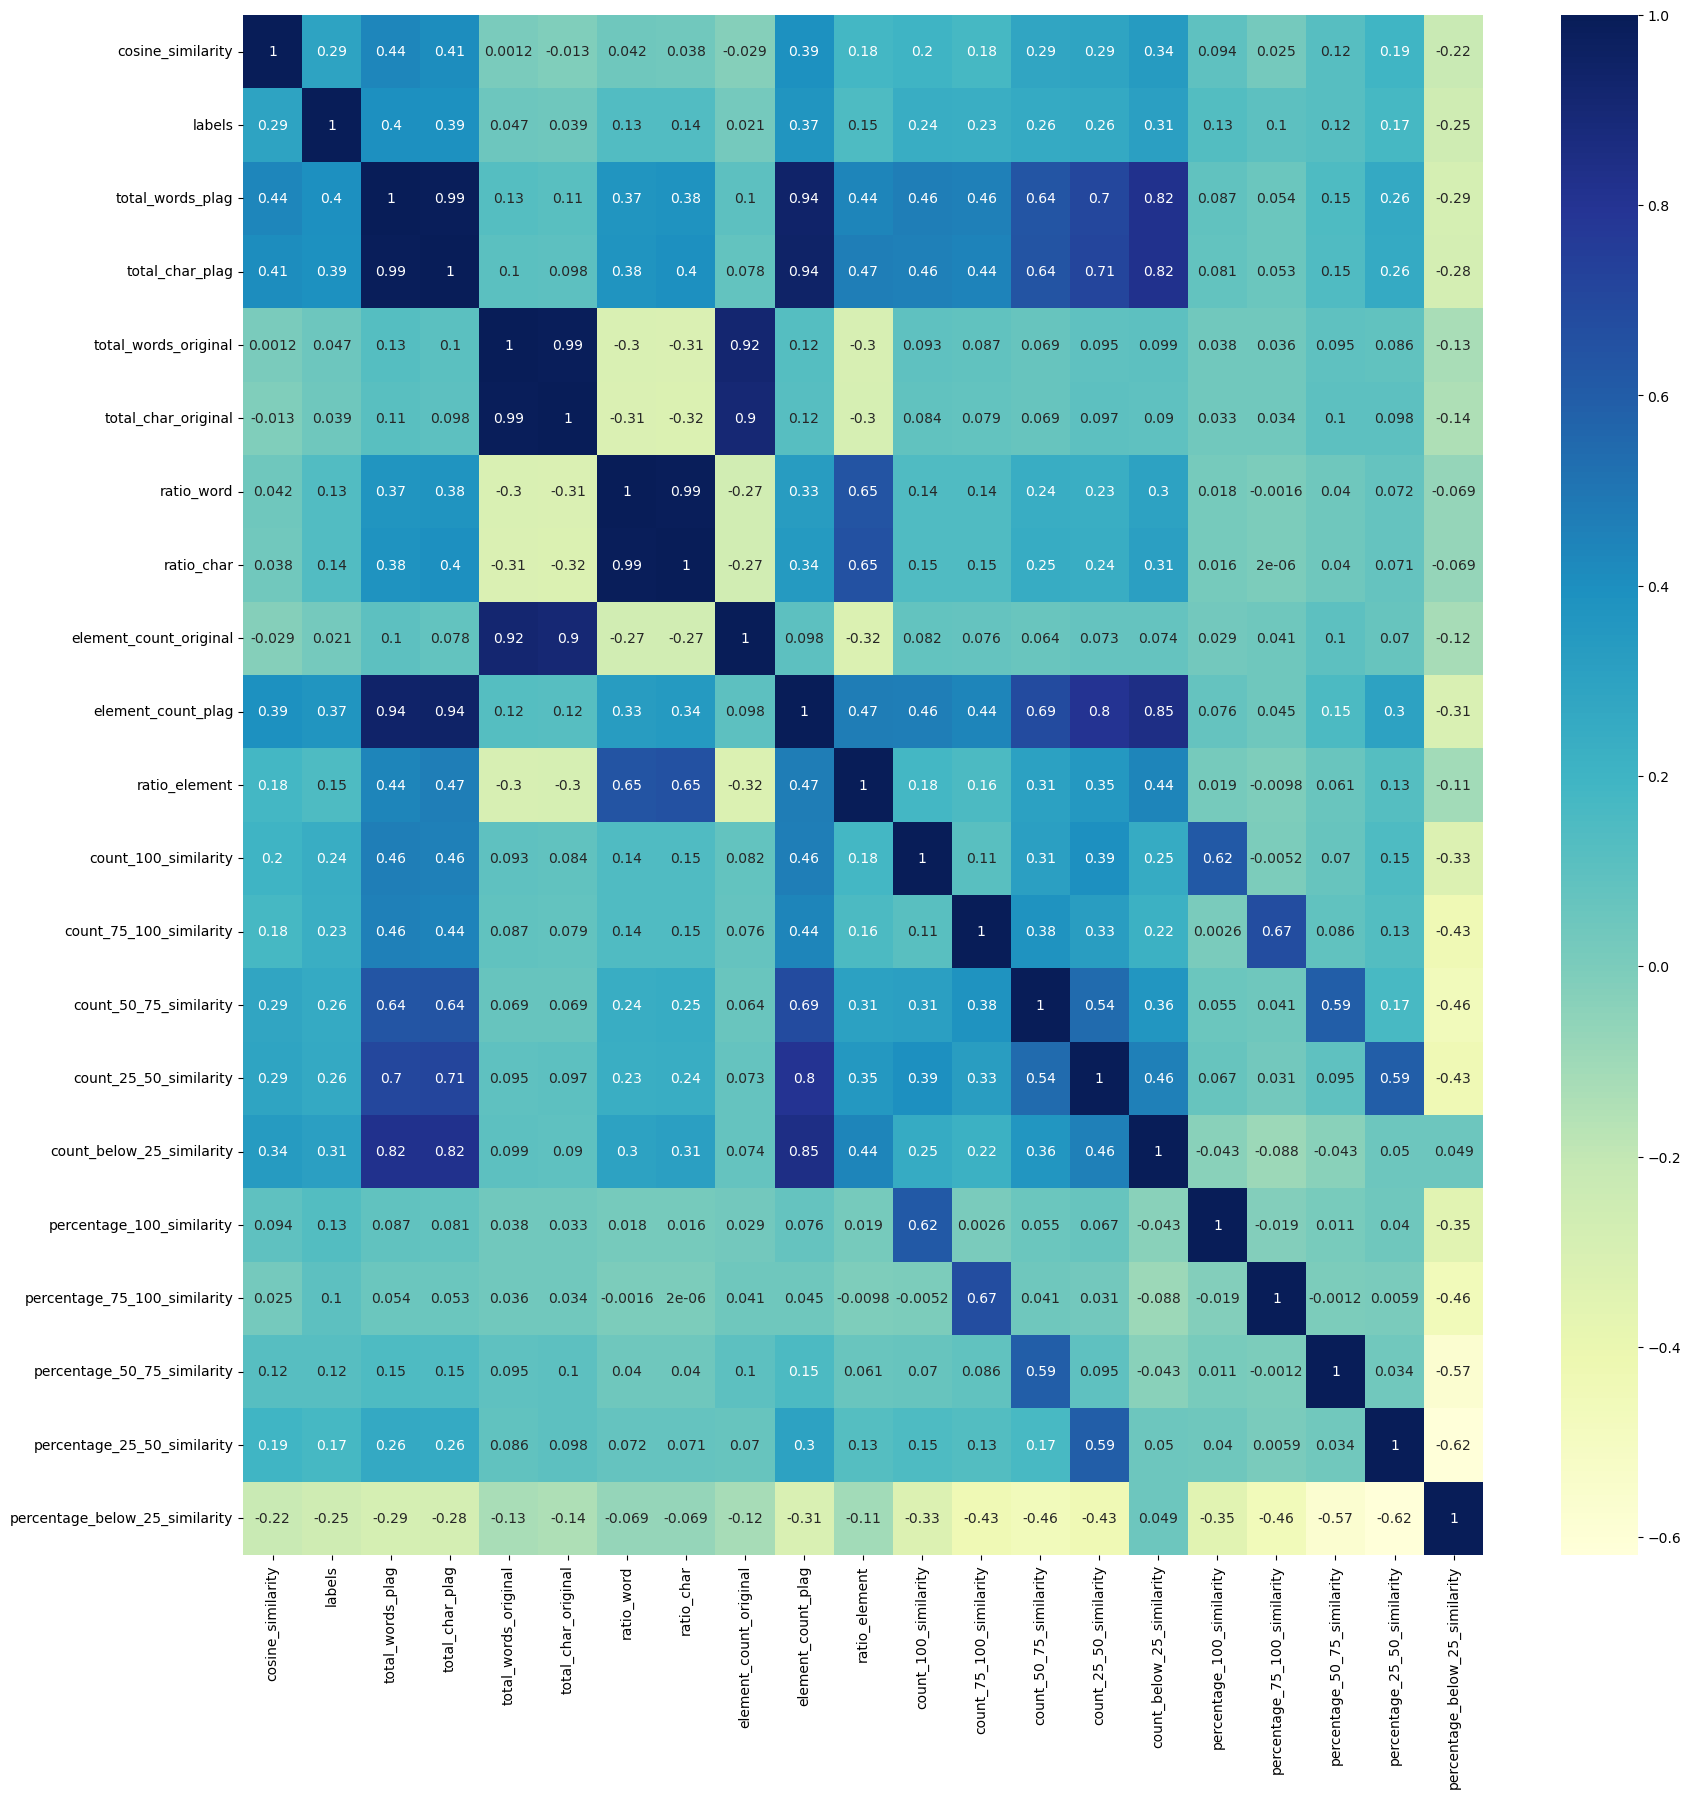

In [81]:
import seaborn as sns
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(final_df.corr(), cmap="YlGnBu", annot=True)
  

plt.show()

In [82]:
X=final_df.drop(['labels'], axis=1)
X.head()

,cosine_similarity,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,element_count_original,element_count_plag,ratio_element,count_100_similarity,count_75_100_similarity,count_50_75_similarity,count_25_50_similarity,count_below_25_similarity,percentage_100_similarity,percentage_75_100_similarity,percentage_50_75_similarity,percentage_25_50_similarity,percentage_below_25_similarity
0,0.891952,156,828,446,2306,0.349776,0.359063,25,11,0.44,1.0,0.0,3.0,1.0,6.0,9.090909,0.0,27.272727,9.090909,54.545455
1,0.890680,54,246,446,2306,0.121076,0.106678,25,2,0.08,0.0,0.0,0.0,0.0,2.0,0.000000,0.0,0.000000,0.000000,100.000000
2,0.572293,21,131,446,2306,0.047085,0.056808,25,1,0.04,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,100.000000
3,0.572293,21,131,446,2306,0.047085,0.056808,25,1,0.04,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,100.000000
4,0.572293,21,131,446,2306,0.047085,0.056808,25,1,0.04,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,100.000000


In [83]:
X.keys()

Index(['cosine_similarity', 'total_words_plag', 'total_char_plag',
       'total_words_original', 'total_char_original', 'ratio_word',
       'ratio_char', 'element_count_original', 'element_count_plag',
       'ratio_element', 'count_100_similarity', 'count_75_100_similarity',
       'count_50_75_similarity', 'count_25_50_similarity',
       'count_below_25_similarity', 'percentage_100_similarity',
       'percentage_75_100_similarity', 'percentage_50_75_similarity',
       'percentage_25_50_similarity', 'percentage_below_25_similarity'],
      dtype='object')

In [84]:
y=final_df[['labels']]
y.head()

,labels
0,0
1,0
2,0
3,0
4,0


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1133, 20)
(284, 20)
(1133, 1)
(284, 1)


# MODEL BUILDING

1. RANDOM FOREST CLASSIFIER

In [198]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=6, max_depth=6)

In [199]:
model1.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=6)

In [200]:
y_pred1=model1.predict(X_test)
y_pred1

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [201]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       233
           1       0.78      0.49      0.60        51

    accuracy                           0.88       284
   macro avg       0.84      0.73      0.77       284
weighted avg       0.88      0.88      0.87       284



In [203]:
print(confusion_matrix(y_test,y_pred1))

[[226   7]
 [ 26  25]]


In [205]:
# Checking accuracy for "training" - overfitting
y_pred_train=model1.predict(X_train)

In [206]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       902
           1       0.87      0.50      0.64       231

    accuracy                           0.88      1133
   macro avg       0.88      0.74      0.78      1133
weighted avg       0.88      0.88      0.87      1133



In [207]:
# Saving the data
#import pickle
#pickle.dump(model,open('model1_random.pkl','wb'))

In [208]:
# PRECISION- RECALL CURVE

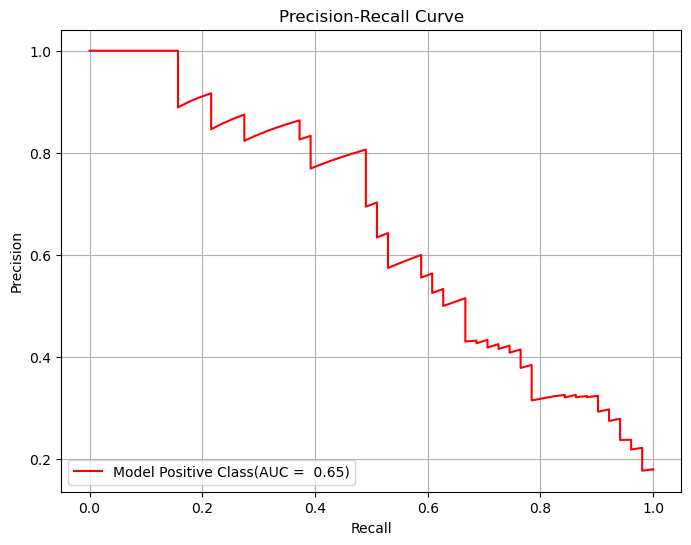

In [209]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

y_scores=model1.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test,y_scores)

auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='r', label=f'Model Positive Class(AUC = {auc_score: .2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [210]:
print(thresholds)

[0.00992063 0.01154618 0.01274806 0.01515152 0.02394293 0.02429425
 0.03034008 0.03204666 0.03320219 0.03403385 0.03548912 0.03946351
 0.04066538 0.04329509 0.04493862 0.04522872 0.04524582 0.04608912
 0.04719508 0.04859335 0.04984058 0.05221157 0.05261225 0.05336425
 0.05526392 0.05751421 0.05811127 0.0593221  0.05995209 0.06111951
 0.06115745 0.06116363 0.06259759 0.0628604  0.06340644 0.06460764
 0.0646344  0.0664588  0.06737469 0.06785087 0.0683591  0.06888155
 0.07045883 0.07051697 0.0726657  0.07314604 0.07391446 0.07392064
 0.07739141 0.07882872 0.07904574 0.08111611 0.08206316 0.0825052
 0.08256984 0.08719099 0.08832581 0.08834368 0.09132242 0.09180275
 0.09437477 0.09473267 0.09624863 0.09795601 0.09958706 0.1038943
 0.10565183 0.10879411 0.11666616 0.11777314 0.11789429 0.12339265
 0.12468158 0.1258729  0.12681363 0.12687881 0.13458752 0.136663
 0.14042534 0.14750452 0.15174221 0.15945092 0.16062953 0.1633294
 0.1707678  0.17278912 0.18464331 0.18472856 0.1874118  0.18869682


In [211]:
y_scores

array([0.2312743 , 0.50603605, 0.16062953, 0.87444938, 0.06460764,
       0.65030228, 0.19933395, 0.06116363, 0.11777314, 0.30925428,
       0.64846265, 0.09180275, 0.04522872, 0.0646344 , 0.58278272,
       0.23535379, 0.18869682, 0.22905769, 0.3278638 , 0.05261225,
       0.0683591 , 0.03204666, 0.07391446, 0.12687881, 0.136663  ,
       0.07392064, 0.0593221 , 0.06460764, 0.10565183, 0.74036583,
       0.34668731, 0.09180275, 0.93738645, 0.35137216, 0.59575381,
       0.03946351, 0.40606337, 0.26173754, 0.320193  , 0.01274806,
       0.0726657 , 0.09624863, 0.1258729 , 0.25584332, 0.07051697,
       0.07314604, 0.93738645, 0.32138713, 0.02394293, 0.69563395,
       0.04066538, 0.04608912, 0.01274806, 0.02429425, 0.0646344 ,
       0.01274806, 0.02429425, 0.25830234, 0.29655826, 0.06340644,
       0.04859335, 0.00992063, 0.0628604 , 0.29889182, 0.04608912,
       0.27496177, 0.07882872, 0.04984058, 0.36498342, 0.1707678 ,
       0.32471701, 0.02394293, 0.41391576, 0.28934177, 0.13666

In [212]:
precision

array([0.17957746, 0.18021201, 0.17730496, 0.17985612, 0.18050542,
       0.18382353, 0.19230769, 0.19305019, 0.19379845, 0.19455253,
       0.19685039, 0.19762846, 0.1984127 , 0.19920319, 0.2       ,
       0.20080321, 0.20576132, 0.20661157, 0.21008403, 0.21276596,
       0.21367521, 0.21551724, 0.21645022, 0.2173913 , 0.21834061,
       0.22026432, 0.22123894, 0.22222222, 0.21875   , 0.21973094,
       0.22072072, 0.22171946, 0.22272727, 0.22374429, 0.22580645,
       0.22790698, 0.23786408, 0.23762376, 0.23880597, 0.24      ,
       0.24120603, 0.24615385, 0.24742268, 0.24870466, 0.25      ,
       0.2513089 , 0.25396825, 0.25945946, 0.26373626, 0.26519337,
       0.26666667, 0.26966292, 0.27272727, 0.27428571, 0.27586207,
       0.27745665, 0.27906977, 0.2748538 , 0.27810651, 0.28313253,
       0.29559748, 0.29746835, 0.29299363, 0.29487179, 0.29677419,
       0.30872483, 0.31081081, 0.31292517, 0.31506849, 0.32394366,
       0.32142857, 0.32374101, 0.32116788, 0.32352941, 0.32592

In [213]:
recall

array([1.        , 1.        , 0.98039216, 0.98039216, 0.98039216,
       0.98039216, 0.98039216, 0.98039216, 0.98039216, 0.98039216,
       0.98039216, 0.98039216, 0.98039216, 0.98039216, 0.98039216,
       0.98039216, 0.98039216, 0.98039216, 0.98039216, 0.98039216,
       0.98039216, 0.98039216, 0.98039216, 0.98039216, 0.98039216,
       0.98039216, 0.98039216, 0.98039216, 0.96078431, 0.96078431,
       0.96078431, 0.96078431, 0.96078431, 0.96078431, 0.96078431,
       0.96078431, 0.96078431, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.92156863, 0.92156863, 0.92156863,
       0.92156863, 0.92156863, 0.90196078, 0.90196078, 0.90196078,
       0.90196078, 0.90196078, 0.90196078, 0.90196078, 0.90196078,
       0.88235294, 0.88235294, 0.8627451 , 0.8627451 , 0.86274

In [214]:
auc_score

0.6497269182242446

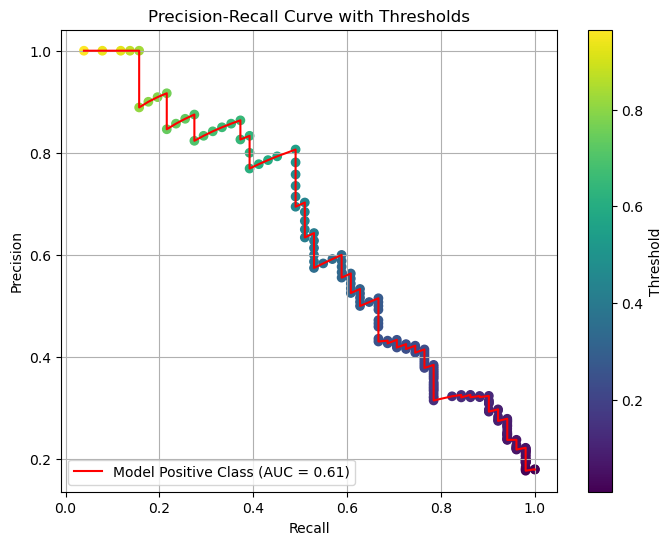

In [215]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

y_scores = model1.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

precision = precision[:-1]
recall = recall[:-1]


auc_score= auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='r', label=f'Model Positive Class (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Thresholds')
plt.legend(loc='lower left')
plt.grid(True)

plt.scatter(recall, precision, c=thresholds, cmap='viridis', marker='o')
cbar = plt.colorbar()
cbar.set_label('Threshold')

plt.show()


In [1]:
threshold = 0.1

predicted_proba = model1.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)

NameError: name 'model1' is not defined

In [24]:
accuracy

NameError: name 'accuracy' is not defined

In [221]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.56      0.71       233
           1       0.31      0.90      0.46        51

    accuracy                           0.62       284
   macro avg       0.64      0.73      0.58       284
weighted avg       0.85      0.62      0.66       284



In [222]:
print(confusion_matrix(y_test,predicted))

[[130 103]
 [  5  46]]


In [230]:
! pip install termcolor
from termcolor import colored


In [231]:
# Get feature importances
importances = model1.feature_importances_

# Print or use feature importances with red color for 0 importance
for feature, importance in zip(X_train.columns, importances):
    if importance == 0:
        # Use the colored function to print in red
        print(colored(f"{feature}: {importance}", 'red'))
    else:
        print(f"{feature}: {importance}")

cosine_similarity: 0.1387313060536434
total_words_plag: 0.11533273781919451
total_char_plag: 0.09200051331215049
total_words_original: 0.03169490773208496
total_char_original: 0.04063514915670713
ratio_word: 0.038441764876445086
ratio_char: 0.0986206496071128
element_count_original: 0.03666137690301067
element_count_plag: 0.14417305143150597
ratio_element: 0.05717235981276945
count_100_similarity: 0.0
count_75_100_similarity: 0.0014543088440021033
count_50_75_similarity: 0.0
count_25_50_similarity: 0.022679043181955055
count_below_25_similarity: 0.00998733384061606
percentage_100_similarity: 0.019777600088342156
percentage_75_100_similarity: 0.0061770845113443594
percentage_50_75_similarity: 0.028602346148777085
percentage_25_50_similarity: 0.018912414581534396
percentage_below_25_similarity: 0.09894605209880442


2. DECISION TREE CLASSIFIER

In [232]:
from sklearn.tree import DecisionTreeClassifier

In [233]:
model2=DecisionTreeClassifier()

In [234]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [235]:
y_pred2=model2.predict(X_test)

In [236]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       233
           1       0.46      0.53      0.49        51

    accuracy                           0.80       284
   macro avg       0.68      0.70      0.68       284
weighted avg       0.82      0.80      0.81       284



In [237]:
# Make predictions on the training data
y_pred_train2 = model2.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train2)
print(training_accuracy)

1.0


In [238]:
model2.score(X_train,y_train)

1.0

In [239]:
grid_param={
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range (1,10,1),
    'min_samples_split' : range (2,10,1),
    'splitter' : ['best','random']
}

In [241]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=model2, param_grid=grid_param,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [242]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'random'}

In [243]:
# By taking the above parameters, we will build the model

In [247]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameters for the DecisionTreeClassifier
model2_best_params = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, min_samples_split=2, splitter='random')

# Fit the model to the training data
model2_best_params.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, splitter='random')

In [248]:
y_pred_best_params_model2=model2_best_params.predict(X_test)

In [249]:
print(classification_report(y_test,y_pred_best_params_model2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       233
           1       0.76      0.49      0.60        51

    accuracy                           0.88       284
   macro avg       0.83      0.73      0.76       284
weighted avg       0.87      0.88      0.87       284



MODEL3: XGBOOST CLASSIFIER

In [251]:
pip install xgboost

                                              0.0/99.7 MB ? eta -:--:--
                                             0.0/99.7 MB 960.0 kB/s eta 0:01:44
                                              0.1/99.7 MB 1.6 MB/s eta 0:01:02
                                              0.2/99.7 MB 1.6 MB/s eta 0:01:04
                                              0.3/99.7 MB 1.8 MB/s eta 0:00:54
                                              0.5/99.7 MB 2.1 MB/s eta 0:00:48
                                              0.6/99.7 MB 2.3 MB/s eta 0:00:45
                                              0.7/99.7 MB 2.2 MB/s eta 0:00:45
                                              0.8/99.7 MB 2.4 MB/s eta 0:00:42
                                              0.9/99.7 MB 2.3 MB/s eta 0:00:43
                                              1.0/99.7 MB 2.4 MB/s eta 0:00:42
                                              1.2/99.7 MB 2.4 MB/s eta 0:00:42
                                              1.3/99.7 MB 

In [253]:

import xgboost as xgb

# Create an XGBoost classifier
model3 = xgb.XGBClassifier()

# Fit the model to the training data
model3.fit(X_train, y_train)

# Make predictions on the test data
y_pred3 = model3.predict(X_test)

# Calculate accuracy on the test data
print(classification_report(y_test,y_pred3))


              precision    recall  f1-score   support

           0       0.90      0.93      0.92       233
           1       0.62      0.55      0.58        51

    accuracy                           0.86       284
   macro avg       0.76      0.74      0.75       284
weighted avg       0.85      0.86      0.86       284



MODEL 4: NAIVE BAYES CLASSIFIER

In [254]:
from sklearn.naive_bayes import GaussianNB

In [256]:
model4=GaussianNB()

In [257]:
model4.fit(X_train, y_train)

GaussianNB()

In [258]:
y_pred4=model4.predict(X_test)

In [259]:
print(classification_report(y_test,y_pred4))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       233
           1       0.61      0.43      0.51        51

    accuracy                           0.85       284
   macro avg       0.75      0.69      0.71       284
weighted avg       0.83      0.85      0.84       284

